# The mode filter for correcting semantic segmentation results
In descriptive statistics there exist multiple summary measures. The mean and the median filter for example allows locally averaging an image in different ways. The [mode](https://en.wikipedia.org/wiki/Mode_(statistics)) filter is less common but still useful in some scenarios. The mode of a pixel in its neighborhood corresponds to the most popular intensity among existing intensities. Thus, it can be used to get rid of indivdual pixels being wrongly classified in a [semantic segmentation](https://en.wikipedia.org/wiki/Image_segmentation#Groups_of_image_segmentation) result.

In [1]:
import numpy as np
import pyclesperanto_prototype as cle
import stackview

For demonstrating the filter, we create a semantic segmentation of blobs.

In [2]:
blobs = cle.imread("../../data/blobs.tif")

cl.OCLArray([[1, 1, 1, ..., 3, 2, 2],
       [1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3],
       ...,
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1]], dtype=uint32)
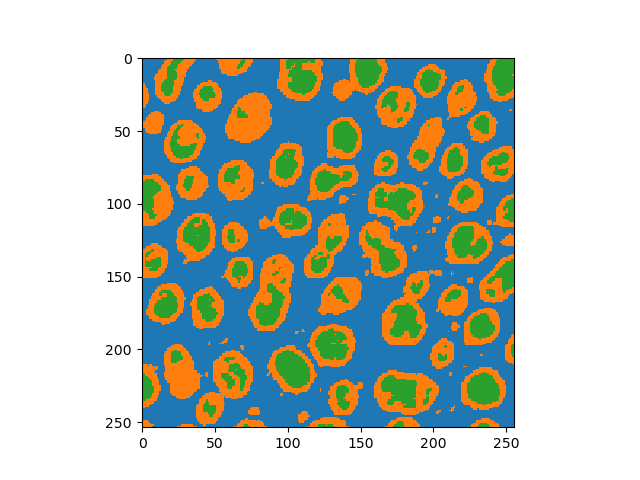

In [3]:
semantic_segmentation = (blobs > 70) + \
                        (blobs > 200) + 1

semantic_segmentation.astype(np.uint32)

Using the functions `mode_sphere` and `mode_box` we can make the result less noisy.

cl.OCLArray([[1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3],
       ...,
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1]], dtype=uint32)
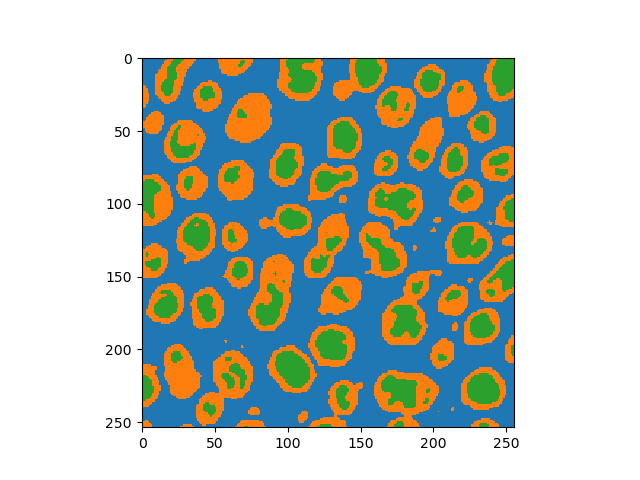

In [7]:
cle.mode_sphere(semantic_segmentation, radius_x=2, radius_y=2).astype(np.uint32)

cl.OCLArray([[1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3],
       ...,
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1]], dtype=uint32)
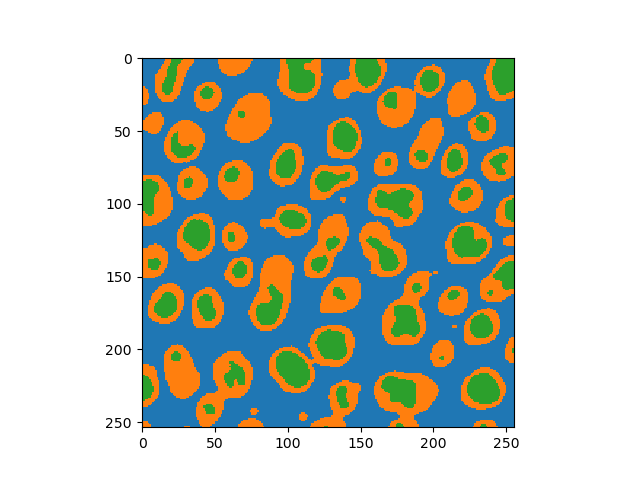

In [8]:
cle.mode_sphere(semantic_segmentation, radius_x=4, radius_y=4).astype(np.uint32)

When the radius becomes wider and wider, the result contains less and less local information.

cl.OCLArray([[1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint32)
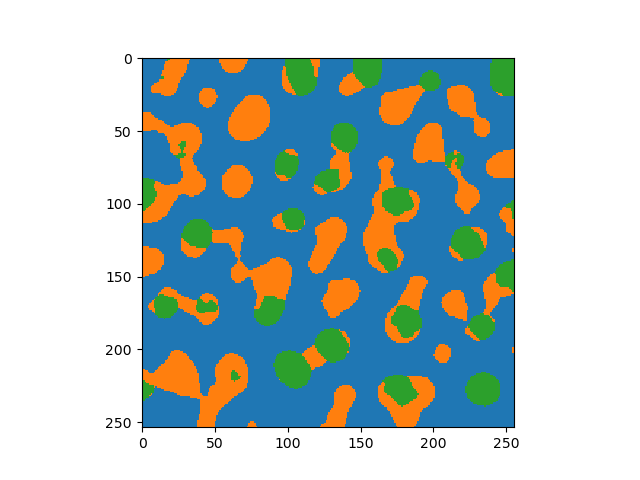

In [10]:
cle.mode_sphere(semantic_segmentation, radius_x=10, radius_y=10).astype(np.uint32)

Tuning the radius manually may help finding a good configuration.

In [5]:
def mode_sphere(image, radius:float = 1):
    return cle.mode_sphere(image, radius_x=radius, radius_y=radius).astype(np.uint32)

stackview.interact(mode_sphere, semantic_segmentation, zoom_factor=1.5)